In [1]:
# Initialisation

In [2]:
import numpy as np

from IPython.display import SVG
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot  # requires graphviz installed

from sklearn.datasets import make_circles

from sklearn.model_selection import train_test_split

%matplotlib inline

Using TensorFlow backend.


In [3]:
# Helper functions

In [4]:
def plot_data(X, y):
    plt.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
    plt.show()

def plot_decision_boundary_with_data(model, X, y, resolution=50):
    # get data range
    h_min, v_min = X.min(axis=0)
    h_max, v_max = X.max(axis=0)
    
    # subdivide the space and create a matrix of points to draw the prediction contour
    h_points = np.linspace(h_min, h_max, resolution)
    v_points = np.linspace(v_min, v_max, resolution)
    
    h_coords, v_coord = np.meshgrid(h_points, v_points)
    background_points = np.c_[h_coords.ravel(), v_coord.ravel()]
    
    predicted_points = model.predict(background_points)
    Z = predicted_points.reshape(h_coords.shape) # reshape to the range of points, but how?

    # size the image and draw the contour + points
    plt.figure(figsize=(12, 8))
    plt.contourf(h_coords, v_coord, Z, cmap='bwr', alpha=0.3)
    plot_data(X, y)

In [5]:
# Generate sample data and split into train and test sets

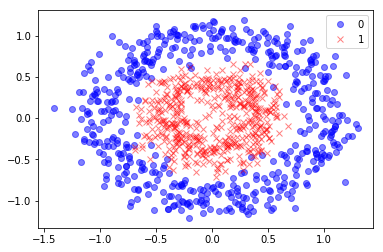

In [6]:
X, y = make_circles(n_samples=1000, noise=0.15, factor=0.4, random_state=123)
plot_data(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [7]:
# Generate a simple 1 layer network identical to the blob_classification

In [8]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid', name='1-dense_layer_1'))
model.compile(Adam(lr=0.03), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=True)
print(model.evaluate(X_test, y_test))  # Accuracy keeps floating around 60%

Epoch 1/100
750/750 [==============================] - 0s 181us/step - loss: 0.7030 - acc: 0.4547
Epoch 2/100
750/750 [==============================] - 0s 30us/step - loss: 0.6958 - acc: 0.5560
Epoch 3/100
750/750 [==============================] - 0s 28us/step - loss: 0.6938 - acc: 0.5760
Epoch 4/100
750/750 [==============================] - 0s 34us/step - loss: 0.6945 - acc: 0.5560
Epoch 5/100
750/750 [==============================] - 0s 30us/step - loss: 0.6937 - acc: 0.5680
Epoch 6/100
750/750 [==============================] - 0s 37us/step - loss: 0.6943 - acc: 0.4320
Epoch 7/100
750/750 [==============================] - 0s 28us/step - loss: 0.6945 - acc: 0.5560
Epoch 8/100
750/750 [==============================] - 0s 34us/step - loss: 0.6938 - acc: 0.6200
Epoch 9/100
750/750 [==============================] - 0s 29us/step - loss: 0.6943 - acc: 0.5520
Epoch 10/100
750/750 [==============================] - 0s 33us/step - loss: 0.6936 - acc: 0.5627
Epoch 11/100
750/750 [======

750/750 [==============================] - 0s 29us/step - loss: 0.6934 - acc: 0.5920
Epoch 85/100
750/750 [==============================] - 0s 32us/step - loss: 0.6951 - acc: 0.5453
Epoch 86/100
750/750 [==============================] - 0s 34us/step - loss: 0.6936 - acc: 0.5773
Epoch 87/100
750/750 [==============================] - 0s 30us/step - loss: 0.6955 - acc: 0.5640
Epoch 88/100
750/750 [==============================] - 0s 34us/step - loss: 0.6957 - acc: 0.5733
Epoch 89/100
750/750 [==============================] - 0s 32us/step - loss: 0.6939 - acc: 0.6040
Epoch 90/100
750/750 [==============================] - 0s 32us/step - loss: 0.6944 - acc: 0.5467
Epoch 91/100
750/750 [==============================] - 0s 31us/step - loss: 0.6934 - acc: 0.4587
Epoch 92/100
750/750 [==============================] - 0s 35us/step - loss: 0.6943 - acc: 0.4573
Epoch 93/100
750/750 [==============================] - 0s 33us/step - loss: 0.6944 - acc: 0.6160
Epoch 94/100
750/750 [===========

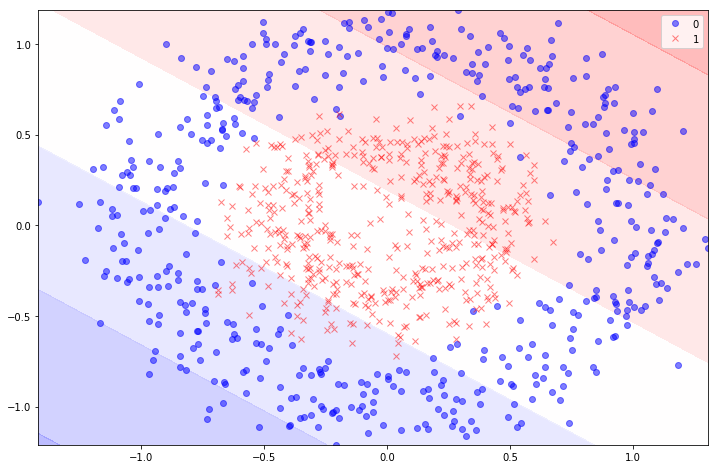

In [9]:
plot_decision_boundary_with_data(model, X, y)  # a single neuron layer is only fittin a linear relation

In [10]:
# Improve the model with 2 hidden layers and more neurons

In [11]:
deep_model = Sequential()
# ~4 is a optimal rule of thumb, but works well with 3 too
deep_model.add(Dense(3, input_shape=(2,), activation="tanh", name='3-dense_layer_1'))  # why tanh works better here?
deep_model.add(Dense(3, activation="tanh", name='3-dense_layer_2'))
deep_model.add(Dense(1, activation="sigmoid", name='1-dense_layer_3'))
deep_model.compile(Adam(lr=0.03), 'binary_crossentropy', metrics=['accuracy'])
deep_model.save_weights('deep_model_pre_train.h5')  # save pre-trained weights for future use

deep_model.fit(X_train, y_train, epochs=100, verbose=False)
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
3-dense_layer_1 (Dense)      (None, 3)                 9         
_________________________________________________________________
3-dense_layer_2 (Dense)      (None, 3)                 12        
_________________________________________________________________
1-dense_layer_3 (Dense)      (None, 1)                 4         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


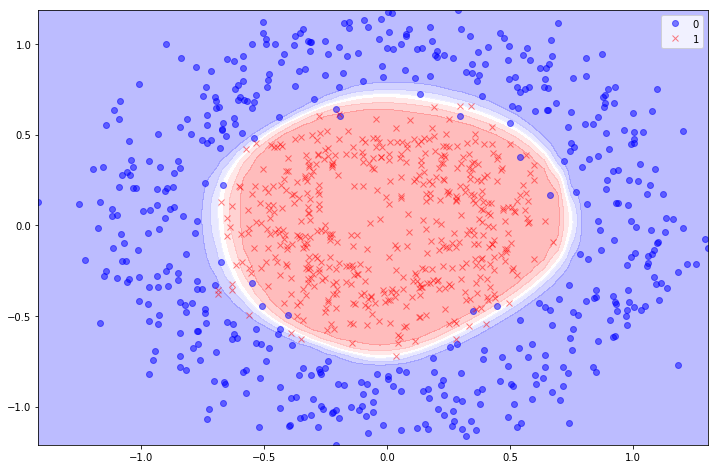

250/250 [==============================] - 0s 137us/step
[0.059169243805110454, 0.98]


In [12]:
plot_decision_boundary_with_data(deep_model, X, y)  # a single neuron layer is only fittin a linear relation
print(deep_model.evaluate(X_test, y_test))  # Accuracy keeps floating around 60%

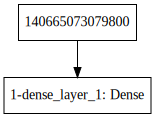

In [13]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

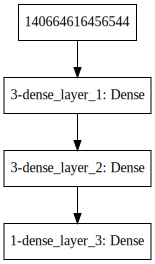

In [14]:
SVG(model_to_dot(deep_model).create(prog='dot', format='svg'))

In [15]:
# Callbacks during the training process

In [16]:
callback_list = [EarlyStopping(monitor='acc', patience=5, mode='max')]
deep_model.fit(X_train, y_train, epochs=100, verbose=True, callbacks=callback_list)

Epoch 1/100
750/750 [==============================] - 0s 35us/step - loss: 0.0621 - acc: 0.9773
Epoch 2/100
750/750 [==============================] - 0s 32us/step - loss: 0.0633 - acc: 0.9747
Epoch 3/100
750/750 [==============================] - 0s 35us/step - loss: 0.0608 - acc: 0.9760
Epoch 4/100
750/750 [==============================] - 0s 35us/step - loss: 0.0761 - acc: 0.9707
Epoch 5/100
750/750 [==============================] - 0s 34us/step - loss: 0.0584 - acc: 0.9760
Epoch 6/100
750/750 [==============================] - 0s 38us/step - loss: 0.0622 - acc: 0.9760


In [17]:
# monitor the accuracy of test data instead. Wouldn't this kinda defeat the purpose of having test data in the first place?
validation_callback_list = [EarlyStopping(monitor='val_acc', patience=5, mode='max')]
deep_model.fit(X_train, y_train, epochs=100, verbose=True, callbacks=callback_list, validation_data=(X_test, y_test))

Train on 750 samples, validate on 250 samples
Epoch 1/100
750/750 [==============================] - 0s 41us/step - loss: 0.0703 - acc: 0.9693 - val_loss: 0.0551 - val_acc: 0.9800
Epoch 2/100
750/750 [==============================] - 0s 36us/step - loss: 0.0660 - acc: 0.9707 - val_loss: 0.0427 - val_acc: 0.9840
Epoch 3/100
750/750 [==============================] - 0s 38us/step - loss: 0.0846 - acc: 0.9667 - val_loss: 0.0452 - val_acc: 0.9800
Epoch 4/100
750/750 [==============================] - 0s 38us/step - loss: 0.0635 - acc: 0.9747 - val_loss: 0.0520 - val_acc: 0.9800
Epoch 5/100
750/750 [==============================] - 0s 40us/step - loss: 0.0641 - acc: 0.9720 - val_loss: 0.0461 - val_acc: 0.9880
Epoch 6/100
750/750 [==============================] - 0s 44us/step - loss: 0.0690 - acc: 0.9720 - val_loss: 0.0539 - val_acc: 0.9840
Epoch 7/100
750/750 [==============================] - 0s 41us/step - loss: 0.0680 - acc: 0.9720 - val_loss: 0.0432 - val_acc: 0.9840
Epoch 8/100
750/

In [18]:
# Model saving

In [19]:
deep_model.save('deep_model.hdf5')

In [20]:
# Custom visualisation callback

In [21]:
from keras.callbacks import Callback

In [22]:
class ProgressPlotter(Callback):
    def on_train_begin(self, logs={}):
        pass

    def on_epoch_end(self, batch, logs={}):
        plot_decision_boundary_with_data(self.model, X, y)

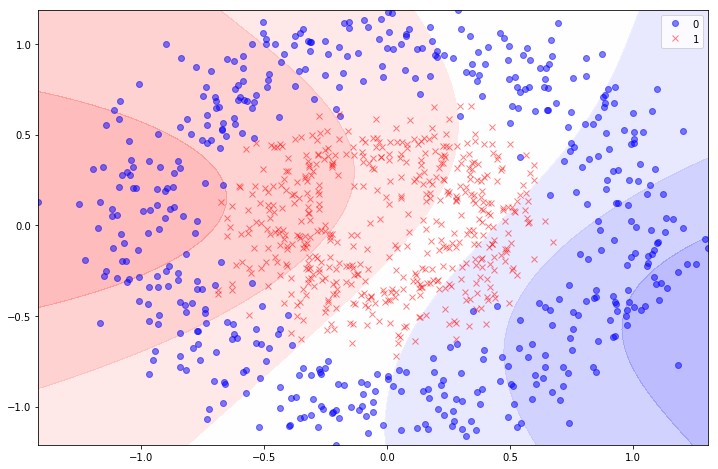

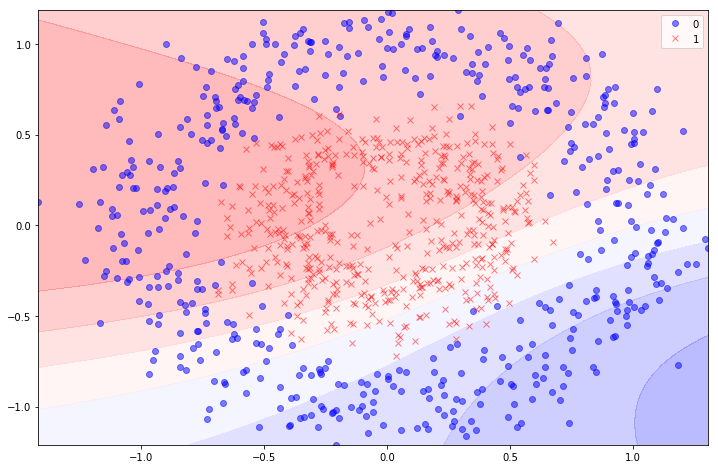

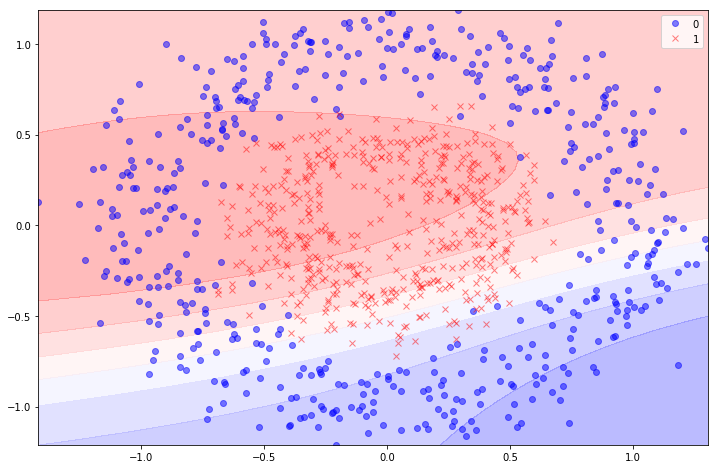

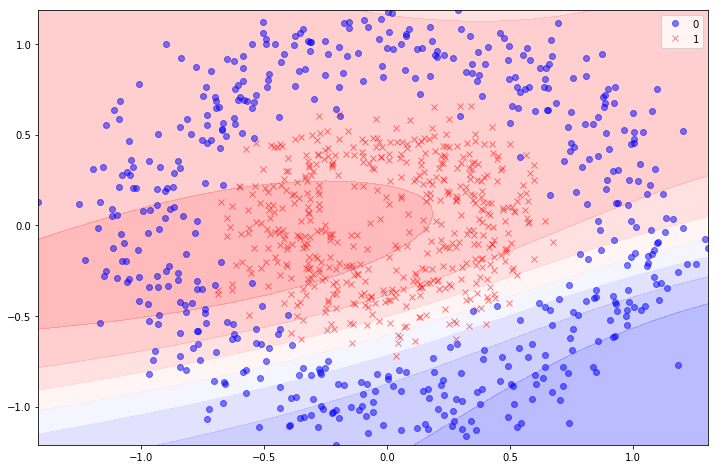

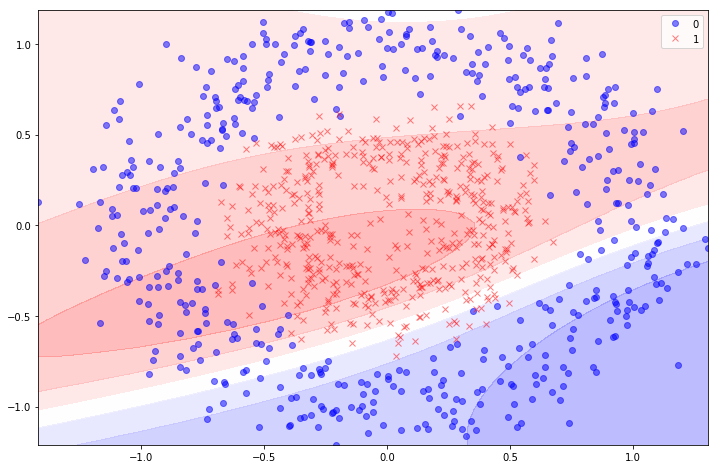

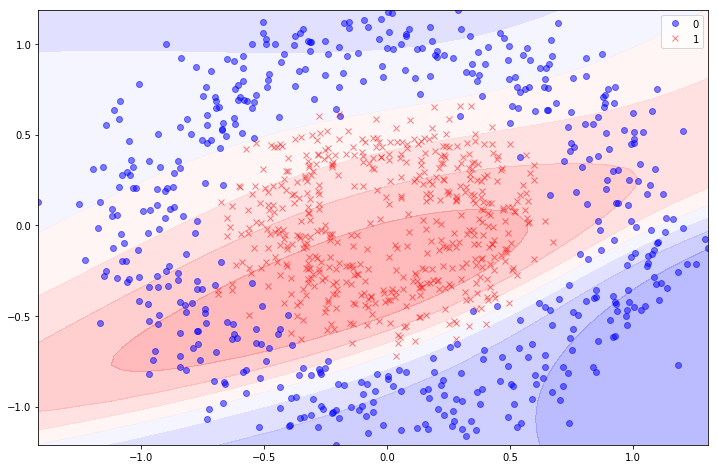

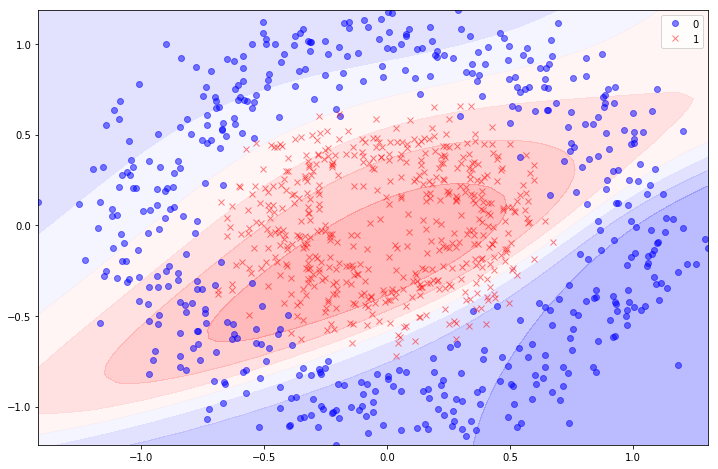

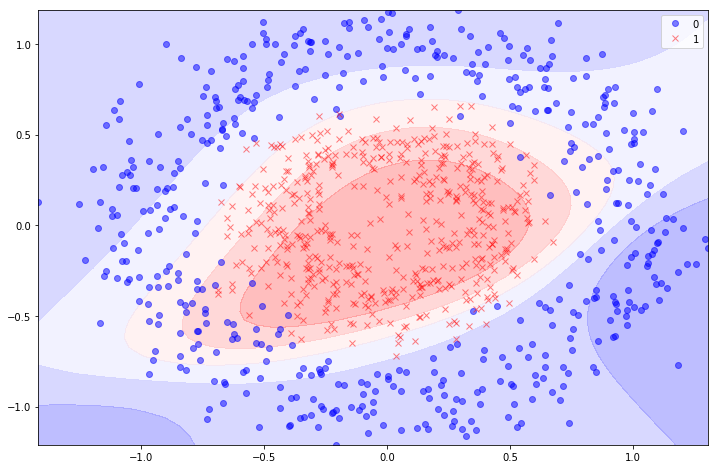

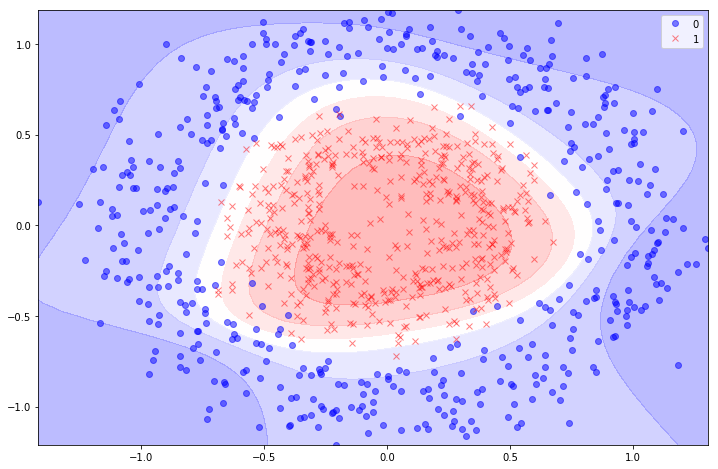

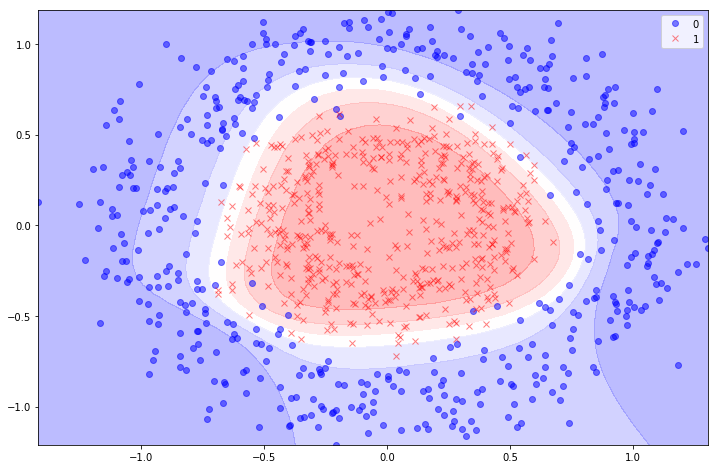

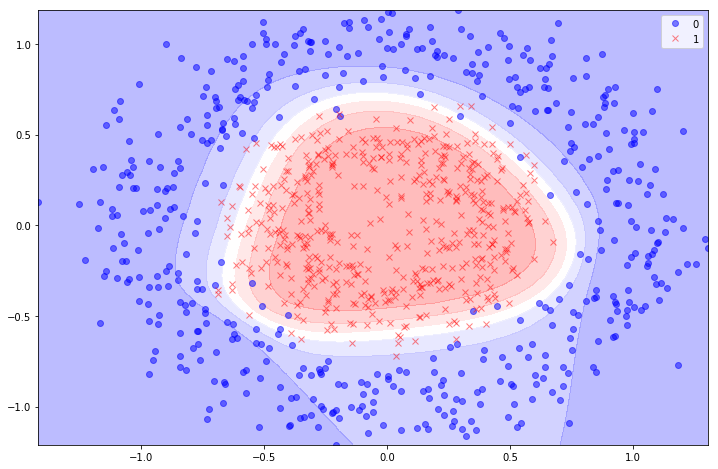

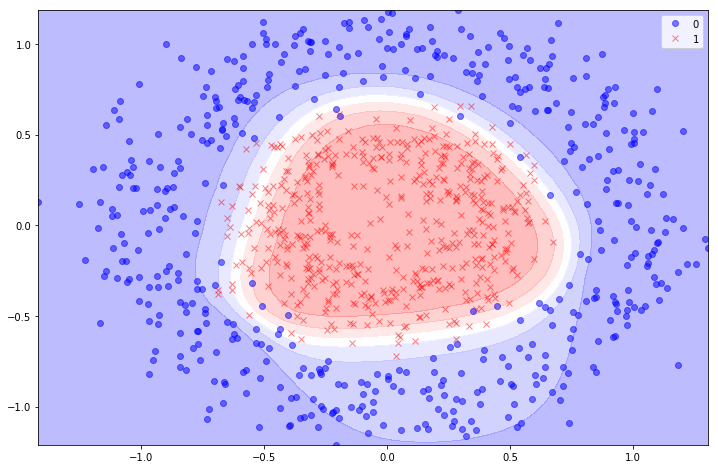

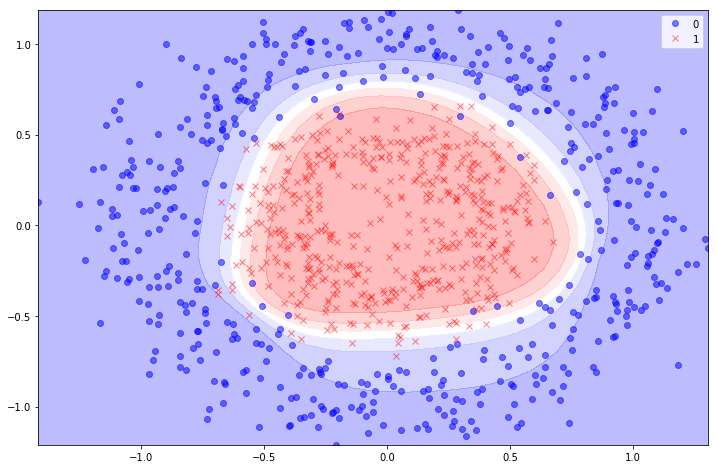

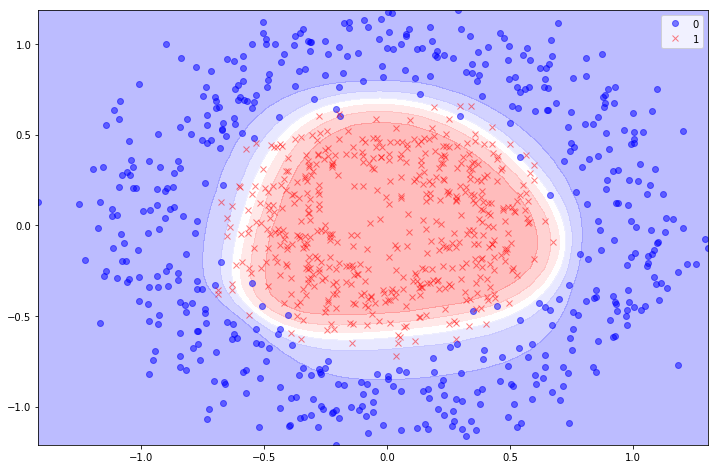

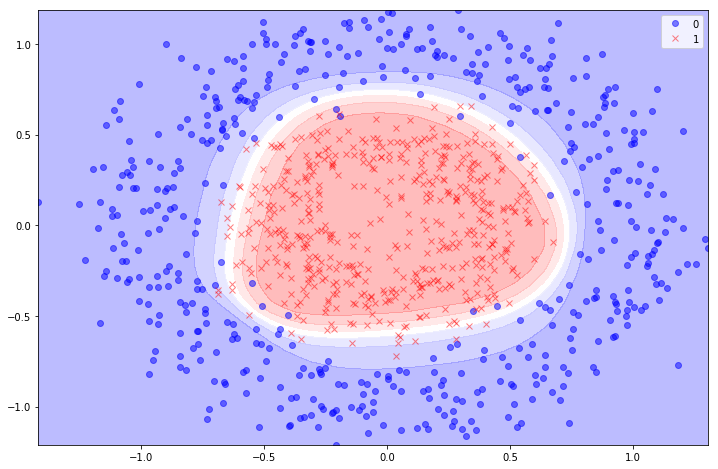

In [26]:
callback_list = [ProgressPlotter(), EarlyStopping(monitor='acc', patience=3, mode='max')]
deep_model.load_weights('deep_model_pre_train.h5')

deep_model.fit(X_train, y_train, epochs=100, verbose=False, callbacks=callback_list)